## Proof of concept

This notebook provides a proof of concept for Diagnostic Efficiency.

In [1]:
from pathlib import Path  # OS-independent path handling

import pandas as pd
from de import de
from de import generate_errors
from de import kge
from de import nse
from de import util
from de import fdc

import warnings
warnings.filterwarnings('ignore')

### Observed streamflow time series from CAMELS dataset

The observed and simulated streamflow time series are part of the open-source CAMELS dataset (Addor
et al., 2017). The data can be downloaded from https://ncar.github.io/hydrology/datasets/CAMELS_timeseries.

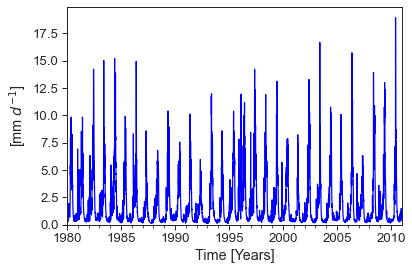

In [2]:
area = 619.11  # catchment area in km2 to convert runoff to mm/day
path = Path('./data/13331500_streamflow_qc.txt')
df_ts = util.import_camels_ts(path, sep=r"\s+", catch_area=area) # import observed time series
fig_ts = util.plot_ts(df_ts)

Observed streamflow time series from CAMELS dataset (gauge_id: 13331500; gauge_name: Minam 160 River near Minam, OR, U.S.)

### Generating artificial errors

Generating artificial errors by systematic manipulation of an observed streamflow time series:
- constant error
- dynamic error
- timing error

#### Positive constant error

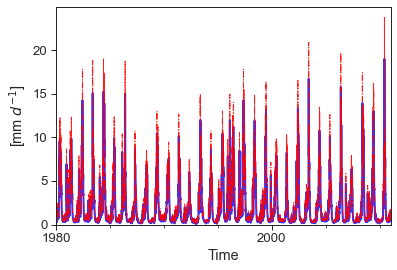

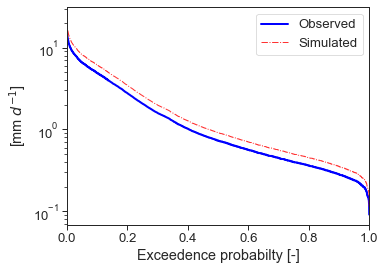

In [3]:
obs_sim = pd.DataFrame(index=df_ts.index, columns=['Qobs', 'Qsim'])
obs_sim.loc[:, 'Qobs'] = df_ts.loc[:, 'Qobs']
# generate positive constant error
obs_sim.loc[:, 'Qsim'] = generate_errors.constant(df_ts['Qobs'].values,
                                                  offset=1.25)

# plot time series
fig_ts = util.plot_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])
# plot flow duration curve
fig_fdc = fdc.fdc_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])

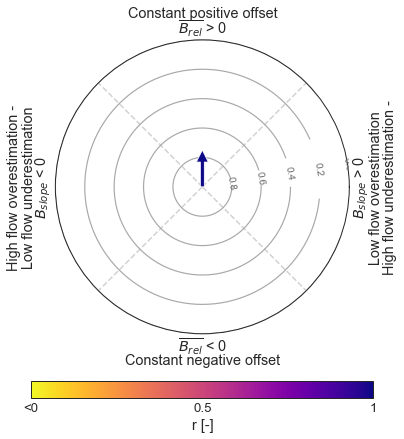

In [4]:
# make arrays
obs_arr = obs_sim['Qobs'].values
sim_arr = obs_sim['Qsim'].values

# diagnostic polar plot
fig_dpp = de.diag_polar_plot(obs_arr, sim_arr)

#### Positive dynamic error

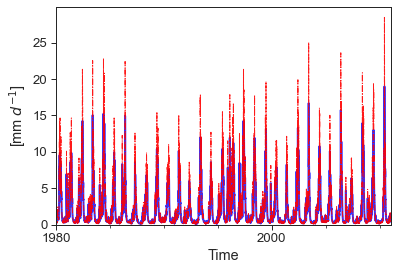

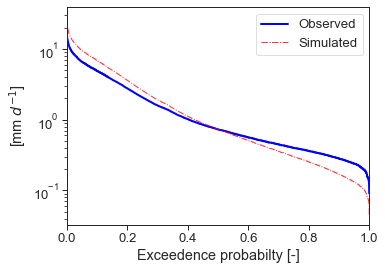

In [5]:
obs_sim = pd.DataFrame(index=df_ts.index, columns=['Qobs', 'Qsim'])
obs_sim.loc[:, 'Qobs'] = df_ts.loc[:, 'Qobs']
# generate positive dynamic error
tsd = generate_errors.positive_dynamic(df_ts.copy(), prop=0.5)
obs_sim.loc[:, 'Qsim'] = tsd.loc[:, 'Qsim']

# plot time series
fig_ts = util.plot_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])
# plot flow duration curve
fig_fdc = fdc.fdc_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])

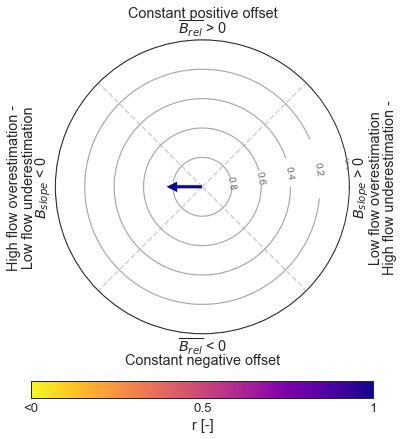

In [6]:
# make arrays
obs_arr = obs_sim['Qobs'].values
sim_arr = obs_sim['Qsim'].values

# diagnostic polar plot
fig_dpp = de.diag_polar_plot(obs_arr, sim_arr)

#### Timing error

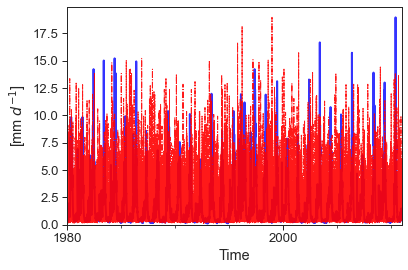

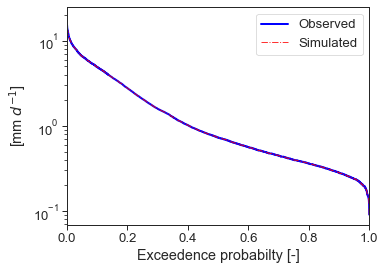

In [7]:
obs_sim = pd.DataFrame(index=df_ts.index, columns=['Qobs', 'Qsim'])
obs_sim.loc[:, 'Qobs'] = df_ts.loc[:, 'Qobs']
# generate timing error
tss = generate_errors.timing(df_ts.copy(), shuffle=True)  # shuffling
obs_sim.loc[:, 'Qsim'] = tss.iloc[:, 0].values

# plot time series
fig_ts = util.plot_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])
# plot flow duration curve
fig_fdc = fdc.fdc_obs_sim(obs_sim['Qobs'], obs_sim['Qsim'])

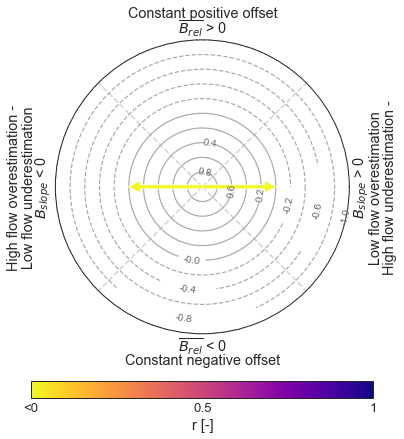

In [8]:
# make arrays
obs_arr = obs_sim['Qobs'].values
sim_arr = obs_sim['Qsim'].values

# diagnostic polar plot
fig_dpp = de.diag_polar_plot(obs_arr, sim_arr)

In this case, the two dynamic error types cannot be distinguished from each other. Thus, the arrow extends in both directions.

### References

Addor, N., Newman, A. J., Mizukami, N., and Clark, M. P.: The CAMELS data set: catchment attributes and meteorology for large-sample studies, in, version 2.0 ed., Boulder, CO: UCAR/NCAR, 2017.